In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Lambda, Attention, Conv1D, MaxPooling1D, Flatten, RepeatVector
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.regularizers import L1L2
from ydata_profiling import ProfileReport

In [3]:
data = pd.read_csv("data\weather_hist_temple.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\gevsi\AppData\Local\Temp\ipykernel_5096\1317266840.py:1: SyntaxWarning: invalid escape sequence '\w'
  data = pd.read_csv("data\weather_hist_temple.csv")


time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0     2023-07-09 00:00:00  43.3   1.9   8.0   0.0   NaN  290.0  14.8   NaN   
1     2023-07-09 01:00:00  43.3   1.9   8.0   0.0   NaN  290.0  14.8   NaN   
2     2023-07-09 02:00:00  41.7   5.3  11.0   0.0   NaN  300.0  13.0   NaN   
3     2023-07-09 03:00:00  41.1   3.5  10.0   0.0   NaN  280.0  18.4   NaN   
4     2023-07-09 04:00:00  38.9   4.4  12.0   0.0   NaN  260.0  14.8   NaN   
...                   ...   ...   ...   ...   ...   ...    ...   ...   ...   
8780  2024-07-08 20:00:00  45.6   8.2  11.0   0.0   NaN  260.0   7.6   NaN   
8781  2024-07-08 21:00:00  47.0   4.6   8.0   0.0   NaN  270.0   9.0   NaN   
8782  2024-07-08 22:00:00  47.2   2.7   7.0   0.0   NaN  220.0  18.4   NaN   
8783  2024-07-08 23:00:00  47.2   4.8   8.0   0.0   NaN  250.0  22.3   NaN   
8784  2024-07-09 00:00:00  47.0   4.6   8.0   0.0   NaN  270.0  22.0   NaN   

        pres  tsun  coco  
0     1001.3   NaN   2.0  
1     1001.3   NaN   2.0  
2     1001.8   NaN   2.0  
3     1002.5   NaN   2.0  
4     1003.4   NaN   2.0  
...      ...   ...   ...  
8780  1001.7   NaN   2.0  
8781  1003.0   NaN   2.0  
8782  1000.0   NaN   2.0  
8783   999.3   NaN   2.0  
8784  1001.0   NaN   2.0  

[8785 rows x 12 columns]

In [4]:
data.describe()

temp         dwpt         rhum         prcp  snow         wdir  \
count  8785.000000  8785.000000  8785.000000  8785.000000   0.0  8785.000000   
mean     25.782242     4.110438    30.030620     0.018873   NaN   156.144565   
std      10.212104     6.796171    18.502821     0.205910   NaN   102.172607   
min       2.200000   -16.400000     4.000000     0.000000   NaN     0.000000   
25%      17.200000    -0.600000    16.000000     0.000000   NaN    90.000000   
50%      25.600000     3.200000    25.000000     0.000000   NaN   139.000000   
75%      34.400000     8.300000    39.000000     0.000000   NaN   250.000000   
max      47.800000    22.200000    93.000000     5.600000   NaN   360.000000   

              wspd  wpgt         pres  tsun         coco  
count  8785.000000   0.0  8785.000000   0.0  8785.000000  
mean     10.432647   NaN  1010.635344   NaN     2.252703  
std       6.756077   NaN     5.053589   NaN     1.440573  
min       0.000000   NaN   995.400000   NaN     1.000000  
25%       5.400000   NaN  1007.000000   NaN     2.000000  
50%       9.400000   NaN  1010.000000   NaN     2.000000  
75%      14.800000   NaN  1014.200000   NaN     3.000000  
max      51.800000   NaN  1026.600000   NaN    25.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8785 non-null   object 
 1   temp    8785 non-null   float64
 2   dwpt    8785 non-null   float64
 3   rhum    8785 non-null   float64
 4   prcp    8785 non-null   float64
 5   snow    0 non-null      float64
 6   wdir    8785 non-null   float64
 7   wspd    8785 non-null   float64
 8   wpgt    0 non-null      float64
 9   pres    8785 non-null   float64
 10  tsun    0 non-null      float64
 11  coco    8785 non-null   float64
dtypes: float64(11), object(1)
memory usage: 823.7+ KB


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'dwpt'}>,
        <Axes: title={'center': 'rhum'}>],
       [<Axes: title={'center': 'prcp'}>,
        <Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'wdir'}>],
       [<Axes: title={'center': 'wspd'}>,
        <Axes: title={'center': 'wpgt'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'tsun'}>,
        <Axes: title={'center': 'coco'}>, <Axes: >]], dtype=object)

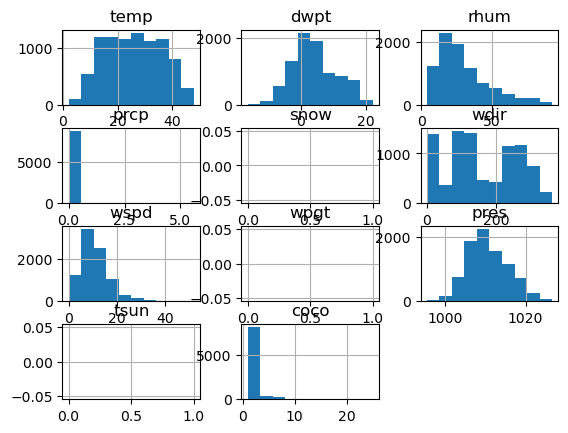

In [6]:
data.hist()

In [7]:
data.isnull().sum()

time       0
temp       0
dwpt       0
rhum       0
prcp       0
snow    8785
wdir       0
wspd       0
wpgt    8785
pres       0
tsun    8785
coco       0
dtype: int64

In [8]:
weather_profile = ProfileReport(data, title="Weather Data Profiling Report")
weather_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data = data.drop(columns=['snow', 'wpgt', 'tsun', 'coco'])
data

time  temp  dwpt  rhum  prcp   wdir  wspd    pres
0     2023-07-09 00:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
1     2023-07-09 01:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
2     2023-07-09 02:00:00  41.7   5.3  11.0   0.0  300.0  13.0  1001.8
3     2023-07-09 03:00:00  41.1   3.5  10.0   0.0  280.0  18.4  1002.5
4     2023-07-09 04:00:00  38.9   4.4  12.0   0.0  260.0  14.8  1003.4
...                   ...   ...   ...   ...   ...    ...   ...     ...
8780  2024-07-08 20:00:00  45.6   8.2  11.0   0.0  260.0   7.6  1001.7
8781  2024-07-08 21:00:00  47.0   4.6   8.0   0.0  270.0   9.0  1003.0
8782  2024-07-08 22:00:00  47.2   2.7   7.0   0.0  220.0  18.4  1000.0
8783  2024-07-08 23:00:00  47.2   4.8   8.0   0.0  250.0  22.3   999.3
8784  2024-07-09 00:00:00  47.0   4.6   8.0   0.0  270.0  22.0  1001.0

[8785 rows x 8 columns]

In [10]:
# Check and handle missing values for all types
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col].fillna(data[col].mean(), inplace=True)

C:\Users\gevsi\AppData\Local\Temp\ipykernel_5096\908293033.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [11]:
data.isnull().sum()

time    0
temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
pres    0
dtype: int64

In [12]:
data.drop_duplicates()

time  temp  dwpt  rhum  prcp   wdir  wspd    pres
0     2023-07-09 00:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
1     2023-07-09 01:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
2     2023-07-09 02:00:00  41.7   5.3  11.0   0.0  300.0  13.0  1001.8
3     2023-07-09 03:00:00  41.1   3.5  10.0   0.0  280.0  18.4  1002.5
4     2023-07-09 04:00:00  38.9   4.4  12.0   0.0  260.0  14.8  1003.4
...                   ...   ...   ...   ...   ...    ...   ...     ...
8780  2024-07-08 20:00:00  45.6   8.2  11.0   0.0  260.0   7.6  1001.7
8781  2024-07-08 21:00:00  47.0   4.6   8.0   0.0  270.0   9.0  1003.0
8782  2024-07-08 22:00:00  47.2   2.7   7.0   0.0  220.0  18.4  1000.0
8783  2024-07-08 23:00:00  47.2   4.8   8.0   0.0  250.0  22.3   999.3
8784  2024-07-09 00:00:00  47.0   4.6   8.0   0.0  270.0  22.0  1001.0

[8785 rows x 8 columns]

In [13]:
data = data[:-1]
data

time  temp  dwpt  rhum  prcp   wdir  wspd    pres
0     2023-07-09 00:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
1     2023-07-09 01:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
2     2023-07-09 02:00:00  41.7   5.3  11.0   0.0  300.0  13.0  1001.8
3     2023-07-09 03:00:00  41.1   3.5  10.0   0.0  280.0  18.4  1002.5
4     2023-07-09 04:00:00  38.9   4.4  12.0   0.0  260.0  14.8  1003.4
...                   ...   ...   ...   ...   ...    ...   ...     ...
8779  2024-07-08 19:00:00  42.6   9.5  14.0   0.0  256.0  11.1  1003.7
8780  2024-07-08 20:00:00  45.6   8.2  11.0   0.0  260.0   7.6  1001.7
8781  2024-07-08 21:00:00  47.0   4.6   8.0   0.0  270.0   9.0  1003.0
8782  2024-07-08 22:00:00  47.2   2.7   7.0   0.0  220.0  18.4  1000.0
8783  2024-07-08 23:00:00  47.2   4.8   8.0   0.0  250.0  22.3   999.3

[8784 rows x 8 columns]

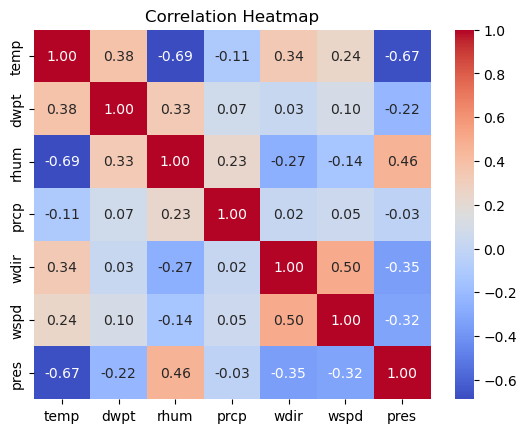

In [14]:

plt.figure()
sns.heatmap(data[['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
weather_data = data
weather_data

time  temp  dwpt  rhum  prcp   wdir  wspd    pres
0     2023-07-09 00:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
1     2023-07-09 01:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
2     2023-07-09 02:00:00  41.7   5.3  11.0   0.0  300.0  13.0  1001.8
3     2023-07-09 03:00:00  41.1   3.5  10.0   0.0  280.0  18.4  1002.5
4     2023-07-09 04:00:00  38.9   4.4  12.0   0.0  260.0  14.8  1003.4
...                   ...   ...   ...   ...   ...    ...   ...     ...
8779  2024-07-08 19:00:00  42.6   9.5  14.0   0.0  256.0  11.1  1003.7
8780  2024-07-08 20:00:00  45.6   8.2  11.0   0.0  260.0   7.6  1001.7
8781  2024-07-08 21:00:00  47.0   4.6   8.0   0.0  270.0   9.0  1003.0
8782  2024-07-08 22:00:00  47.2   2.7   7.0   0.0  220.0  18.4  1000.0
8783  2024-07-08 23:00:00  47.2   4.8   8.0   0.0  250.0  22.3   999.3

[8784 rows x 8 columns]

In [16]:
data = pd.read_csv("data\hourly_campus_total_365.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\gevsi\AppData\Local\Temp\ipykernel_5096\2880941550.py:1: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv("data\hourly_campus_total_365.csv")


campus  bldgno bldgname tstamp  Year  Month  Day  Hour        KW  \
0     All Campuses     NaN                  2023      7    9     0  20831.11   
1     All Campuses     NaN                  2023      7    9     1  20550.51   
2     All Campuses     NaN                  2023      7    9     2  19909.30   
3     All Campuses     NaN                  2023      7    9     3  19851.40   
4     All Campuses     NaN                  2023      7    9     4  20081.35   
...            ...     ...      ...    ...   ...    ...  ...   ...       ...   
8779  All Campuses     NaN                  2024      7    8    19  23991.31   
8780  All Campuses     NaN                  2024      7    8    20  22315.89   
8781  All Campuses     NaN                  2024      7    8    21  22121.42   
8782  All Campuses     NaN                  2024      7    8    22  21323.99   
8783  All Campuses     NaN                  2024      7    8    23  21064.16   

         KWS  ...  HTmmBTU#Houses  HTmmBTUlightbulbs  HTmmBTUgalsgas  \
0      57.07  ...             326              81529              31   
1      75.66  ...             338              84596              32   
2       1.43  ...             324              80986              31   
3     100.97  ...             322              80498              31   
4      41.83  ...             325              81206              31   
...      ...  ...             ...                ...             ...   
8779  168.20  ...             286              71456              27   
8780    1.62  ...             305              76137              29   
8781    0.55  ...             304              75916              29   
8782    0.54  ...             291              72812              28   
8783    0.53  ...             317              79198              30   

      Total#Houses  Totallightbulbs  Totalgalsgas     GHG  DOW  tstamp2  \
0          16263.0        4065016.0       81495.0  11.281    1      NaN   
1          15844.0        3960304.0       78673.0  11.118    1      NaN   
2          15395.0        3848128.0       76612.0  10.810    1      NaN   
3          15296.0        3823514.0       75970.0  10.723    1      NaN   
4          15685.0        3920724.0       78543.0  10.880    1      NaN   
...            ...              ...           ...     ...  ...      ...   
8779       18382.0        4594851.0       91806.0  12.937    2      NaN   
8780       17329.0        4331545.0       86921.0  12.117    2      NaN   
8781       16684.0        4170331.0       82216.0  12.010    2      NaN   
8782       15936.0        3983268.0       78094.0  11.579    2      NaN   
8783       14447.0        3611110.0       66602.0  11.437    2      NaN   

         total  
0     20831.11  
1     20550.51  
2     19909.30  
3     19851.40  
4     20081.35  
...        ...  
8779  23991.31  
8780  22315.89  
8781  22121.42  
8782  21323.99  
8783  21064.16  

[8784 rows x 30 columns]

In [17]:
data.describe()

bldgno         Year        Month          Day         Hour  \
count     0.0  8784.000000  8784.000000  8784.000000  8784.000000   
mean      NaN  2023.519126     6.513661    15.756831    11.500000   
std       NaN     0.499663     3.451430     8.812031     6.922581   
min       NaN  2023.000000     1.000000     1.000000     0.000000   
25%       NaN  2023.000000     4.000000     8.000000     5.750000   
50%       NaN  2024.000000     7.000000    16.000000    11.500000   
75%       NaN  2024.000000    10.000000    23.000000    17.250000   
max       NaN  2024.000000    12.000000    31.000000    23.000000   

                 KW           KWS        CHWTON      HTmmBTU  Combined mmBTU  \
count  8.784000e+03   8784.000000   8784.000000  8784.000000    8.784000e+03   
mean  -2.880380e+32   2106.760123   6346.424974     5.593632   -9.828266e+29   
std    2.668166e+34   3001.875334   4513.138631     1.654718    9.104163e+31   
min   -2.500600e+36     -0.500000      0.000000     0.000000   -8.532402e+33   
25%    1.550410e+04      1.630000   2676.307500     4.210000    9.312500e+01   
50%    1.784483e+04     88.370000   5198.990000     5.410000    1.300800e+02   
75%    2.208185e+04   4090.472500   9367.500000     6.810000    1.898700e+02   
max    3.799226e+04  11932.520000  19279.800000    12.210000    3.464700e+02   

       ...  HTmmBTU#Houses  HTmmBTUlightbulbs  HTmmBTUgalsgas  Total#Houses  \
count  ...     8784.000000        8784.000000     8784.000000  8.784000e+03   
mean   ...      468.381831      117065.900956       44.751935 -8.229657e+31   
std    ...      138.556270       34630.872685       13.242294  7.623333e+33   
min    ...        0.000000           0.000000        0.000000 -7.144571e+35   
25%    ...      353.000000       88130.000000       34.000000  7.797750e+03   
50%    ...      453.000000      113200.000000       43.000000  1.089250e+04   
75%    ...      570.000000      142455.500000       54.000000  1.589875e+04   
max    ...     1023.000000      255567.000000       98.000000  2.901200e+04   

       Totallightbulbs  Totalgalsgas           GHG          DOW  tstamp2  \
count     8.784000e+03  8.784000e+03  8.784000e+03  8784.000000      0.0   
mean     -2.057415e+34 -2.765165e+31 -1.564051e+29     3.986339      NaN   
std       1.905834e+36  2.561440e+33  1.448819e+31     2.003480      NaN   
min      -1.786144e+38 -2.400576e+35 -1.357830e+33     1.000000      NaN   
25%       1.949321e+06  2.291050e+04  7.371000e+00     2.000000      NaN   
50%       2.722671e+06  4.333250e+04  8.741500e+00     4.000000      NaN   
75%       3.974052e+06  7.700850e+04  1.073175e+01     6.000000      NaN   
max       7.251758e+06  1.570810e+05  1.927300e+01     7.000000      NaN   

              total  
count  8.784000e+03  
mean  -2.880380e+32  
std    2.668166e+34  
min   -2.500600e+36  
25%    1.550410e+04  
50%    1.784483e+04  
75%    2.208185e+04  
max    3.799226e+04  

[8 rows x 27 columns]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campus                8784 non-null   object 
 1   bldgno                0 non-null      float64
 2   bldgname              8784 non-null   object 
 3   tstamp                8784 non-null   object 
 4   Year                  8784 non-null   int64  
 5   Month                 8784 non-null   int64  
 6   Day                   8784 non-null   int64  
 7   Hour                  8784 non-null   int64  
 8   KW                    8784 non-null   float64
 9   KWS                   8784 non-null   float64
 10  CHWTON                8784 non-null   float64
 11  HTmmBTU               8784 non-null   float64
 12  Combined mmBTU        8784 non-null   float64
 13  Combined Tons Carbon  8784 non-null   float64
 14  KW#Houses             8784 non-null   float64
 15  KWlightbulbs         

In [19]:
data = data.drop(columns=['campus', 'bldgno', 'bldgname', 'tstamp', 'tstamp2'])
data

Year  Month  Day  Hour        KW     KWS    CHWTON  HTmmBTU  \
0     2023      7    9     0  20831.11   57.07   9936.89     3.90   
1     2023      7    9     1  20550.51   75.66   9587.54     4.04   
2     2023      7    9     2  19909.30    1.43   9337.62     3.87   
3     2023      7    9     3  19851.40  100.97   9258.02     3.85   
4     2023      7    9     4  20081.35   41.83   9576.87     3.88   
...    ...    ...  ...   ...       ...     ...       ...      ...   
8779  2024      7    8    19  23991.31  168.20  11187.90     3.41   
8780  2024      7    8    20  22315.89    1.62  10597.34     3.64   
8781  2024      7    8    21  22121.42    0.55  10011.60     3.63   
8782  2024      7    8    22  21323.99    0.54   9505.90     3.48   
8783  2024      7    8    23  21064.16    0.53   8072.50     3.78   

      Combined mmBTU  Combined Tons Carbon  ...  CHWTONgalsgas  \
0             194.22                 35.50  ...            954   
1             189.21                 34.58  ...            920   
2             183.85                 33.60  ...            896   
3             182.68                 33.39  ...            889   
4             187.32                 34.24  ...            919   
...              ...                   ...  ...            ...   
8779          219.53                 40.12  ...           1074   
8780          206.95                 37.82  ...           1017   
8781          199.25                 36.42  ...            961   
8782          190.31                 34.78  ...            913   
8783          172.53                 31.53  ...            775   

      HTmmBTU#Houses  HTmmBTUlightbulbs  HTmmBTUgalsgas  Total#Houses  \
0                326              81529              31       16263.0   
1                338              84596              32       15844.0   
2                324              80986              31       15395.0   
3                322              80498              31       15296.0   
4                325              81206              31       15685.0   
...              ...                ...             ...           ...   
8779             286              71456              27       18382.0   
8780             305              76137              29       17329.0   
8781             304              75916              29       16684.0   
8782             291              72812              28       15936.0   
8783             317              79198              30       14447.0   

      Totallightbulbs  Totalgalsgas     GHG  DOW     total  
0           4065016.0       81495.0  11.281    1  20831.11  
1           3960304.0       78673.0  11.118    1  20550.51  
2           3848128.0       76612.0  10.810    1  19909.30  
3           3823514.0       75970.0  10.723    1  19851.40  
4           3920724.0       78543.0  10.880    1  20081.35  
...               ...           ...     ...  ...       ...  
8779        4594851.0       91806.0  12.937    2  23991.31  
8780        4331545.0       86921.0  12.117    2  22315.89  
8781        4170331.0       82216.0  12.010    2  22121.42  
8782        3983268.0       78094.0  11.579    2  21323.99  
8783        3611110.0       66602.0  11.437    2  21064.16  

[8784 rows x 25 columns]

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>, <Axes: title={'center': 'KW'}>],
       [<Axes: title={'center': 'KWS'}>,
        <Axes: title={'center': 'CHWTON'}>,
        <Axes: title={'center': 'HTmmBTU'}>,
        <Axes: title={'center': 'Combined mmBTU'}>,
        <Axes: title={'center': 'Combined Tons Carbon'}>],
       [<Axes: title={'center': 'KW#Houses'}>,
        <Axes: title={'center': 'KWlightbulbs'}>,
        <Axes: title={'center': 'KWgalsgas'}>,
        <Axes: title={'center': 'CHWTON#Houses'}>,
        <Axes: title={'center': 'CHWTONlightbulbs'}>],
       [<Axes: title={'center': 'CHWTONgalsgas'}>,
        <Axes: title={'center': 'HTmmBTU#Houses'}>,
        <Axes: title={'center': 'HTmmBTUlightbulbs'}>,
        <Axes: title={'center': 'HTmmBTUgalsgas'}>,
        <Axes: title={'center': 'Total#Houses'}>],
       [<Axes: title={'center': 'Totallightbulb

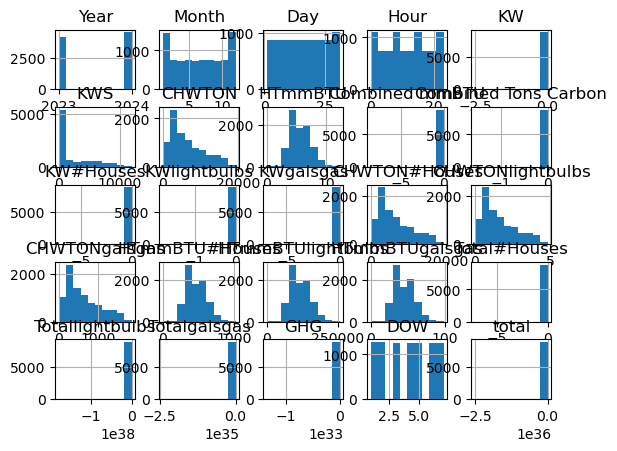

In [20]:
data.hist()

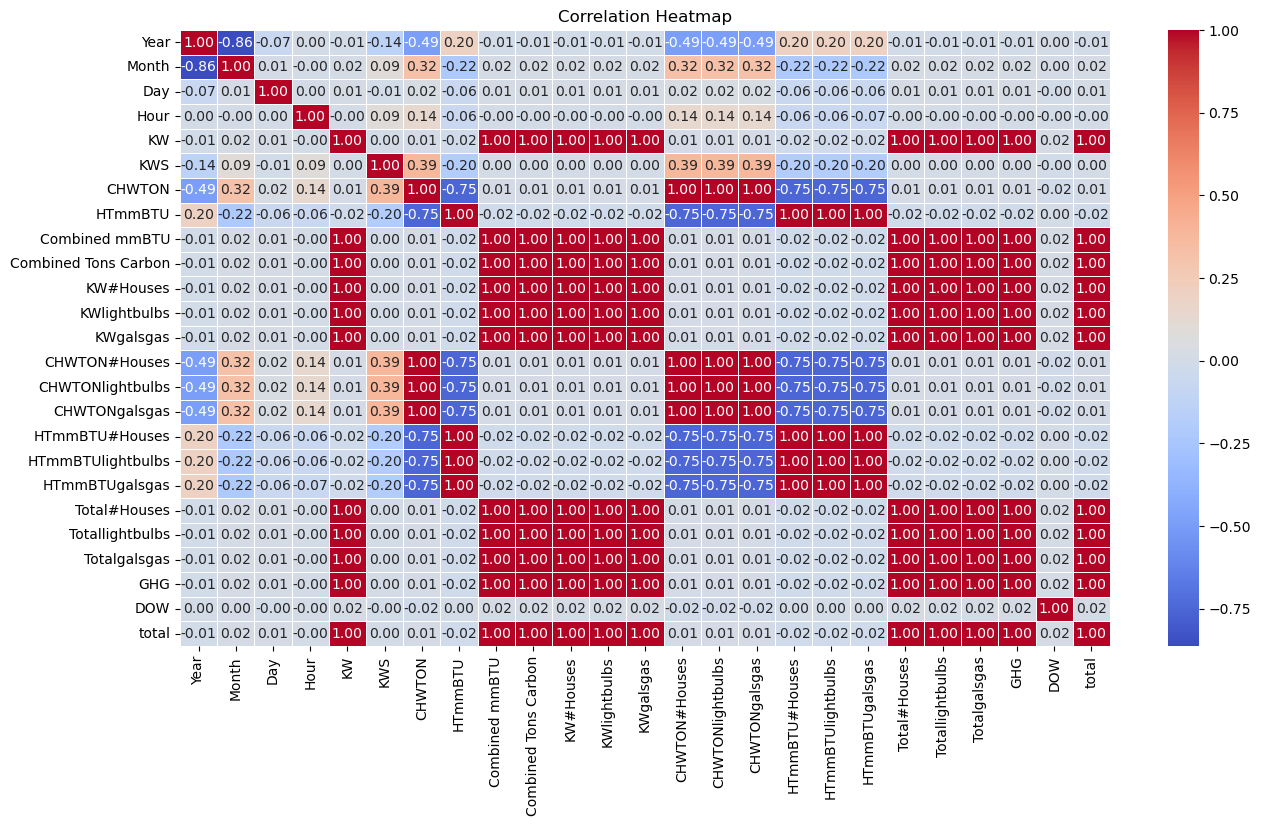

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm',  linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
data = data.drop(columns=['total'])
data

Year  Month  Day  Hour        KW     KWS    CHWTON  HTmmBTU  \
0     2023      7    9     0  20831.11   57.07   9936.89     3.90   
1     2023      7    9     1  20550.51   75.66   9587.54     4.04   
2     2023      7    9     2  19909.30    1.43   9337.62     3.87   
3     2023      7    9     3  19851.40  100.97   9258.02     3.85   
4     2023      7    9     4  20081.35   41.83   9576.87     3.88   
...    ...    ...  ...   ...       ...     ...       ...      ...   
8779  2024      7    8    19  23991.31  168.20  11187.90     3.41   
8780  2024      7    8    20  22315.89    1.62  10597.34     3.64   
8781  2024      7    8    21  22121.42    0.55  10011.60     3.63   
8782  2024      7    8    22  21323.99    0.54   9505.90     3.48   
8783  2024      7    8    23  21064.16    0.53   8072.50     3.78   

      Combined mmBTU  Combined Tons Carbon  ...  CHWTONlightbulbs  \
0             194.22                 35.50  ...           2495549   
1             189.21                 34.58  ...           2407814   
2             183.85                 33.60  ...           2345049   
3             182.68                 33.39  ...           2325059   
4             187.32                 34.24  ...           2405136   
...              ...                   ...  ...               ...   
8779          219.53                 40.12  ...           2809730   
8780          206.95                 37.82  ...           2661416   
8781          199.25                 36.42  ...           2514313   
8782          190.31                 34.78  ...           2387313   
8783          172.53                 31.53  ...           2027328   

      CHWTONgalsgas  HTmmBTU#Houses  HTmmBTUlightbulbs  HTmmBTUgalsgas  \
0               954             326              81529              31   
1               920             338              84596              32   
2               896             324              80986              31   
3               889             322              80498              31   
4               919             325              81206              31   
...             ...             ...                ...             ...   
8779           1074             286              71456              27   
8780           1017             305              76137              29   
8781            961             304              75916              29   
8782            913             291              72812              28   
8783            775             317              79198              30   

      Total#Houses  Totallightbulbs  Totalgalsgas     GHG  DOW  
0          16263.0        4065016.0       81495.0  11.281    1  
1          15844.0        3960304.0       78673.0  11.118    1  
2          15395.0        3848128.0       76612.0  10.810    1  
3          15296.0        3823514.0       75970.0  10.723    1  
4          15685.0        3920724.0       78543.0  10.880    1  
...            ...              ...           ...     ...  ...  
8779       18382.0        4594851.0       91806.0  12.937    2  
8780       17329.0        4331545.0       86921.0  12.117    2  
8781       16684.0        4170331.0       82216.0  12.010    2  
8782       15936.0        3983268.0       78094.0  11.579    2  
8783       14447.0        3611110.0       66602.0  11.437    2  

[8784 rows x 24 columns]

In [23]:
def create_timestamp(row):
  # Extract year, month, day, and hour values
  year = int(row['Year'])
  month = int(row['Month'])
  day = int(row['Day'])
  hour = int(row['Hour'])
  # Create datetime object
  timestamp = datetime(year, month, day, hour)
  return timestamp

In [24]:
# Apply the function to create a new 'tstamp' column
data['tstamp'] = data.apply(create_timestamp, axis=1)
data

Year  Month  Day  Hour        KW     KWS    CHWTON  HTmmBTU  \
0     2023      7    9     0  20831.11   57.07   9936.89     3.90   
1     2023      7    9     1  20550.51   75.66   9587.54     4.04   
2     2023      7    9     2  19909.30    1.43   9337.62     3.87   
3     2023      7    9     3  19851.40  100.97   9258.02     3.85   
4     2023      7    9     4  20081.35   41.83   9576.87     3.88   
...    ...    ...  ...   ...       ...     ...       ...      ...   
8779  2024      7    8    19  23991.31  168.20  11187.90     3.41   
8780  2024      7    8    20  22315.89    1.62  10597.34     3.64   
8781  2024      7    8    21  22121.42    0.55  10011.60     3.63   
8782  2024      7    8    22  21323.99    0.54   9505.90     3.48   
8783  2024      7    8    23  21064.16    0.53   8072.50     3.78   

      Combined mmBTU  Combined Tons Carbon  ...  CHWTONgalsgas  \
0             194.22                 35.50  ...            954   
1             189.21                 34.58  ...            920   
2             183.85                 33.60  ...            896   
3             182.68                 33.39  ...            889   
4             187.32                 34.24  ...            919   
...              ...                   ...  ...            ...   
8779          219.53                 40.12  ...           1074   
8780          206.95                 37.82  ...           1017   
8781          199.25                 36.42  ...            961   
8782          190.31                 34.78  ...            913   
8783          172.53                 31.53  ...            775   

      HTmmBTU#Houses  HTmmBTUlightbulbs  HTmmBTUgalsgas  Total#Houses  \
0                326              81529              31       16263.0   
1                338              84596              32       15844.0   
2                324              80986              31       15395.0   
3                322              80498              31       15296.0   
4                325              81206              31       15685.0   
...              ...                ...             ...           ...   
8779             286              71456              27       18382.0   
8780             305              76137              29       17329.0   
8781             304              75916              29       16684.0   
8782             291              72812              28       15936.0   
8783             317              79198              30       14447.0   

      Totallightbulbs  Totalgalsgas     GHG  DOW              tstamp  
0           4065016.0       81495.0  11.281    1 2023-07-09 00:00:00  
1           3960304.0       78673.0  11.118    1 2023-07-09 01:00:00  
2           3848128.0       76612.0  10.810    1 2023-07-09 02:00:00  
3           3823514.0       75970.0  10.723    1 2023-07-09 03:00:00  
4           3920724.0       78543.0  10.880    1 2023-07-09 04:00:00  
...               ...           ...     ...  ...                 ...  
8779        4594851.0       91806.0  12.937    2 2024-07-08 19:00:00  
8780        4331545.0       86921.0  12.117    2 2024-07-08 20:00:00  
8781        4170331.0       82216.0  12.010    2 2024-07-08 21:00:00  
8782        3983268.0       78094.0  11.579    2 2024-07-08 22:00:00  
8783        3611110.0       66602.0  11.437    2 2024-07-08 23:00:00  

[8784 rows x 25 columns]

In [25]:
column_type1 = data['tstamp'].dtype
column_type2 = weather_data['time'].dtype
print(column_type1, column_type2)

datetime64[ns] object


In [26]:
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')
weather_data

C:\Users\gevsi\AppData\Local\Temp\ipykernel_5096\2505754318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')


time  temp  dwpt  rhum  prcp   wdir  wspd    pres
0    2023-07-09 00:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
1    2023-07-09 01:00:00  43.3   1.9   8.0   0.0  290.0  14.8  1001.3
2    2023-07-09 02:00:00  41.7   5.3  11.0   0.0  300.0  13.0  1001.8
3    2023-07-09 03:00:00  41.1   3.5  10.0   0.0  280.0  18.4  1002.5
4    2023-07-09 04:00:00  38.9   4.4  12.0   0.0  260.0  14.8  1003.4
...                  ...   ...   ...   ...   ...    ...   ...     ...
8779 2024-07-08 19:00:00  42.6   9.5  14.0   0.0  256.0  11.1  1003.7
8780 2024-07-08 20:00:00  45.6   8.2  11.0   0.0  260.0   7.6  1001.7
8781 2024-07-08 21:00:00  47.0   4.6   8.0   0.0  270.0   9.0  1003.0
8782 2024-07-08 22:00:00  47.2   2.7   7.0   0.0  220.0  18.4  1000.0
8783 2024-07-08 23:00:00  47.2   4.8   8.0   0.0  250.0  22.3   999.3

[8784 rows x 8 columns]

In [27]:
column_type1 = data['tstamp'].dtype
column_type2 = weather_data['time'].dtype
print(column_type1, column_type2)

datetime64[ns] datetime64[ns]


In [28]:
joined_data = data.set_index('tstamp').join(weather_data.set_index('time'), how='inner')
joined_data

Year  Month  Day  Hour        KW     KWS    CHWTON  \
tstamp                                                                    
2023-07-09 00:00:00  2023      7    9     0  20831.11   57.07   9936.89   
2023-07-09 01:00:00  2023      7    9     1  20550.51   75.66   9587.54   
2023-07-09 02:00:00  2023      7    9     2  19909.30    1.43   9337.62   
2023-07-09 03:00:00  2023      7    9     3  19851.40  100.97   9258.02   
2023-07-09 04:00:00  2023      7    9     4  20081.35   41.83   9576.87   
...                   ...    ...  ...   ...       ...     ...       ...   
2024-07-08 19:00:00  2024      7    8    19  23991.31  168.20  11187.90   
2024-07-08 20:00:00  2024      7    8    20  22315.89    1.62  10597.34   
2024-07-08 21:00:00  2024      7    8    21  22121.42    0.55  10011.60   
2024-07-08 22:00:00  2024      7    8    22  21323.99    0.54   9505.90   
2024-07-08 23:00:00  2024      7    8    23  21064.16    0.53   8072.50   

                     HTmmBTU  Combined mmBTU  Combined Tons Carbon  ...  \
tstamp                                                              ...   
2023-07-09 00:00:00     3.90          194.22                 35.50  ...   
2023-07-09 01:00:00     4.04          189.21                 34.58  ...   
2023-07-09 02:00:00     3.87          183.85                 33.60  ...   
2023-07-09 03:00:00     3.85          182.68                 33.39  ...   
2023-07-09 04:00:00     3.88          187.32                 34.24  ...   
...                      ...             ...                   ...  ...   
2024-07-08 19:00:00     3.41          219.53                 40.12  ...   
2024-07-08 20:00:00     3.64          206.95                 37.82  ...   
2024-07-08 21:00:00     3.63          199.25                 36.42  ...   
2024-07-08 22:00:00     3.48          190.31                 34.78  ...   
2024-07-08 23:00:00     3.78          172.53                 31.53  ...   

                     Totalgalsgas     GHG  DOW  temp  dwpt  rhum  prcp   wdir  \
tstamp                                                                          
2023-07-09 00:00:00       81495.0  11.281    1  43.3   1.9   8.0   0.0  290.0   
2023-07-09 01:00:00       78673.0  11.118    1  43.3   1.9   8.0   0.0  290.0   
2023-07-09 02:00:00       76612.0  10.810    1  41.7   5.3  11.0   0.0  300.0   
2023-07-09 03:00:00       75970.0  10.723    1  41.1   3.5  10.0   0.0  280.0   
2023-07-09 04:00:00       78543.0  10.880    1  38.9   4.4  12.0   0.0  260.0   
...                           ...     ...  ...   ...   ...   ...   ...    ...   
2024-07-08 19:00:00       91806.0  12.937    2  42.6   9.5  14.0   0.0  256.0   
2024-07-08 20:00:00       86921.0  12.117    2  45.6   8.2  11.0   0.0  260.0   
2024-07-08 21:00:00       82216.0  12.010    2  47.0   4.6   8.0   0.0  270.0   
2024-07-08 22:00:00       78094.0  11.579    2  47.2   2.7   7.0   0.0  220.0   
2024-07-08 23:00:00       66602.0  11.437    2  47.2   4.8   8.0   0.0  250.0   

                     wspd    pres  
tstamp                             
2023-07-09 00:00:00  14.8  1001.3  
2023-07-09 01:00:00  14.8  1001.3  
2023-07-09 02:00:00  13.0  1001.8  
2023-07-09 03:00:00  18.4  1002.5  
2023-07-09 04:00:00  14.8  1003.4  
...                   ...     ...  
2024-07-08 19:00:00  11.1  1003.7  
2024-07-08 20:00:00   7.6  1001.7  
2024-07-08 21:00:00   9.0  1003.0  
2024-07-08 22:00:00  18.4  1000.0  
2024-07-08 23:00:00  22.3   999.3  

[8784 rows x 31 columns]

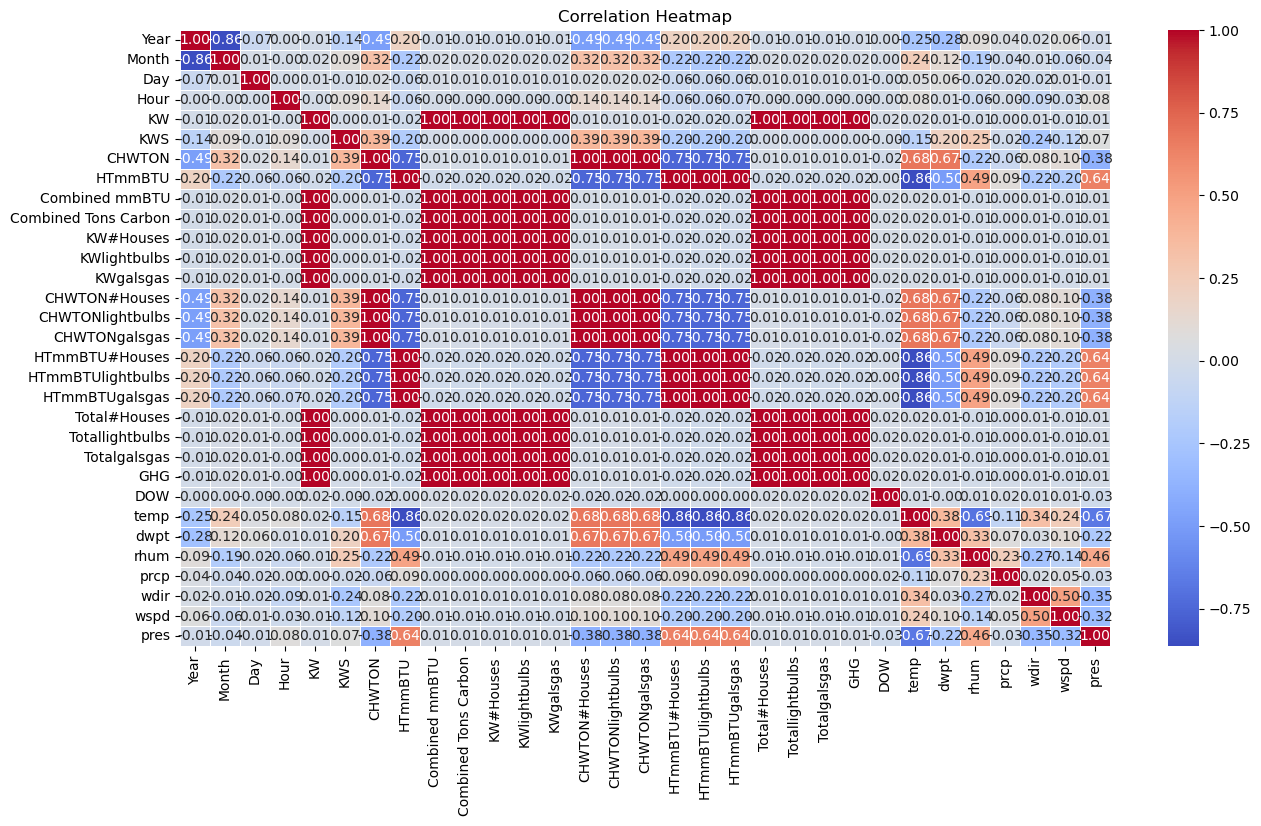

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(joined_data.corr(), annot=True, fmt=".2f", cmap='coolwarm',  linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
features_data = joined_data[['Year', 'Month', 'Day', 'Hour', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'KWS', 'HTmmBTUgalsgas']]
features_data

Year  Month  Day  Hour  temp  dwpt  rhum  prcp   wdir  \
tstamp                                                                       
2023-07-09 00:00:00  2023      7    9     0  43.3   1.9   8.0   0.0  290.0   
2023-07-09 01:00:00  2023      7    9     1  43.3   1.9   8.0   0.0  290.0   
2023-07-09 02:00:00  2023      7    9     2  41.7   5.3  11.0   0.0  300.0   
2023-07-09 03:00:00  2023      7    9     3  41.1   3.5  10.0   0.0  280.0   
2023-07-09 04:00:00  2023      7    9     4  38.9   4.4  12.0   0.0  260.0   
...                   ...    ...  ...   ...   ...   ...   ...   ...    ...   
2024-07-08 19:00:00  2024      7    8    19  42.6   9.5  14.0   0.0  256.0   
2024-07-08 20:00:00  2024      7    8    20  45.6   8.2  11.0   0.0  260.0   
2024-07-08 21:00:00  2024      7    8    21  47.0   4.6   8.0   0.0  270.0   
2024-07-08 22:00:00  2024      7    8    22  47.2   2.7   7.0   0.0  220.0   
2024-07-08 23:00:00  2024      7    8    23  47.2   4.8   8.0   0.0  250.0   

                     wspd    pres     KWS  HTmmBTUgalsgas  
tstamp                                                     
2023-07-09 00:00:00  14.8  1001.3   57.07              31  
2023-07-09 01:00:00  14.8  1001.3   75.66              32  
2023-07-09 02:00:00  13.0  1001.8    1.43              31  
2023-07-09 03:00:00  18.4  1002.5  100.97              31  
2023-07-09 04:00:00  14.8  1003.4   41.83              31  
...                   ...     ...     ...             ...  
2024-07-08 19:00:00  11.1  1003.7  168.20              27  
2024-07-08 20:00:00   7.6  1001.7    1.62              29  
2024-07-08 21:00:00   9.0  1003.0    0.55              29  
2024-07-08 22:00:00  18.4  1000.0    0.54              28  
2024-07-08 23:00:00  22.3   999.3    0.53              30  

[8784 rows x 13 columns]

## Random Forest Regressor (Seperate Models) ##

In [32]:
# Split data
X_train_elec, X_test_elec, y_train_elec, y_test_elec = train_test_split(features_data.drop(['KWS'], axis=1), features_data['KWS'], test_size=0.2)
X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(features_data.drop(['HTmmBTUgalsgas'], axis=1), features_data['HTmmBTUgalsgas'], test_size=0.2)

In [33]:
# Create Random Forest models
model_elec = RandomForestRegressor()
model_gas = RandomForestRegressor()

In [34]:
# Train models
model_elec.fit(X_train_elec, y_train_elec)
model_gas.fit(X_train_gas, y_train_gas)

# Make predictions
y_pred_elec = model_elec.predict(X_test_elec)
y_pred_gas = model_gas.predict(X_test_gas)

In [35]:
# Evaluate models

# Mean squared error
mse_elec = mean_squared_error(y_test_elec, y_pred_elec)
mse_gas = mean_squared_error(y_test_gas, y_pred_gas)

# Mean absolute error
mae_elec = mean_absolute_error(y_test_elec, y_pred_elec)
mae_gas = mean_absolute_error(y_test_gas, y_pred_gas)

# Calculate mean absolute percentage error (MAPE)
mape_elec = mean_absolute_percentage_error(y_test_elec, y_pred_elec)
mape_gas = mean_absolute_percentage_error(y_test_gas, y_pred_gas)

# Calculate R-squared (R2) score
r2_elec = r2_score(y_test_elec, y_pred_elec)
r2_gas = r2_score(y_test_gas, y_pred_gas)

# Print evaluation metrics
print("Electricity MSE:", mse_elec)
print("Gas MSE:", mse_gas)
print("Electricity MAE:", mae_elec)
print("Gas MAE:", mae_gas)
print("Electricity MAPE:", mape_elec)
print("Gas MAPE:", mape_gas)
print("Electricity R2:", r2_elec)
print("Gas R2:", r2_gas)

Electricity MSE: 483563.1064634643
Gas MSE: 7.502568981217985
Electricity MAE: 338.4311825270348
Gas MAE: 1.7002333523050657
Electricity MAPE: 2.0233064184690776e+16
Gas MAPE: 186295743265388.5
Electricity R2: 0.9461200160942024
Gas R2: 0.9546224258422368


## Attention LSTM (Seperate Models)

In [37]:
# Split data
X_train_elec, X_test_elec, y_train_elec, y_test_elec = train_test_split(features_data.drop(['KWS'], axis=1), features_data['KWS'], test_size=0.2, shuffle = False)
X_train_gas, X_test_gas, y_train_gas, y_test_gas = train_test_split(features_data.drop(['HTmmBTUgalsgas'], axis=1), features_data['HTmmBTUgalsgas'], test_size=0.2, shuffle = False)

In [38]:
def create_attention_lstm_model(look_back: int, n_features: int) -> Model:
    
    # Define the input layer
    inputs = Input(shape=(look_back, n_features))
    
    # First LSTM layer
    lstm_out = LSTM(100, return_sequences=True, kernel_regularizer=L1L2(l1=0, l2=0))(inputs)
    
    # Attention layer
    attention_out = Attention()([lstm_out, lstm_out])
    
    # Second LSTM layer
    lstm_out2 = LSTM(100, return_sequences=False, kernel_regularizer=L1L2(l1=0, l2=0))(attention_out)
    
    # Output layer
    outputs = Dense(1, activation='relu')(lstm_out2)
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_absolute_error')
    
    return model

In [39]:
look_back = 24
model_elec = create_attention_lstm_model(look_back, X_train_elec.shape[1])
model_gas = create_attention_lstm_model(look_back, X_train_gas.shape[1])

In [40]:
def create_sliding_windows_with_padding(X: pd.DataFrame, y: pd.Series, look_back: int) -> tuple:
    """
    Creates sliding windows of data for LSTM input with padding.

    Args:
    X (pd.DataFrame): The input features.
    y (pd.Series): The target labels.
    look_back (int): The number of previous time steps to consider.

    Returns:
    tuple: A tuple containing the reshaped input data and corresponding labels.
    """
    X_array = X.values
    y_array = y.values
    
    # Pad the input data
    pad_width = look_back - 1
    X_padded = np.pad(X_array, ((pad_width, 0), (0, 0)), mode='constant')
    
    X_windows = []
    y_windows = []
    
    # Adjust the loop to ensure we do not go out of bounds
    for i in range(len(X_array)):
        if i + look_back - 1 < len(y_array):  # Ensure we do not go out of bounds
            X_windows.append(X_padded[i:i + look_back])
            y_windows.append(y_array[i + look_back - 1])  # Predict the next value after the window
    
    return np.array(X_windows), np.array(y_windows)

In [41]:
# Check shapes of the test data and labels
print("X_test_elec shape:", X_test_elec.shape)
print("y_test_elec shape:", y_test_elec.shape)
print("X_test_gas shape:", X_test_gas.shape)
print("y_test_gas shape:", y_test_gas.shape)

X_test_elec shape: (1757, 12)
y_test_elec shape: (1757,)
X_test_gas shape: (1757, 12)
y_test_gas shape: (1757,)


In [42]:
X_train_elec_reshaped, y_train_elec_reshaped = create_sliding_windows_with_padding(X_train_elec, y_train_elec, look_back)
X_train_gas_reshaped, y_train_gas_reshaped = create_sliding_windows_with_padding(X_train_gas, y_train_gas, look_back)

In [43]:
# Create sliding windows for test data with padding
X_test_elec_reshaped, y_test_elec_reshaped = create_sliding_windows_with_padding(X_test_elec, y_test_elec, look_back)
X_test_gas_reshaped, y_test_gas_reshaped = create_sliding_windows_with_padding(X_test_gas, y_test_gas, look_back)

In [44]:
# Check shapes after reshaping
print("X_test_elec_reshaped shape:", X_test_elec_reshaped.shape)
print("y_test_elec_reshaped shape:", y_test_elec_reshaped.shape)
print("X_test_gas_reshaped shape:", X_test_gas_reshaped.shape)
print("y_test_gas_reshaped shape:", y_test_gas_reshaped.shape)

X_test_elec_reshaped shape: (1734, 24, 12)
y_test_elec_reshaped shape: (1734,)
X_test_gas_reshaped shape: (1734, 24, 12)
y_test_gas_reshaped shape: (1734,)


In [45]:
# Train the model
model_elec.fit(X_train_elec_reshaped, y_train_elec_reshaped, epochs=5, batch_size=24, validation_split=0.2)
model_gas.fit(X_train_gas_reshaped, y_train_gas_reshaped, epochs=5, batch_size=24, validation_split=0.2)

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 2241.3765 - val_loss: 1583.1879
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2223.8789 - val_loss: 1583.8462
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2235.3313 - val_loss: 1584.0389
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2261.6804 - val_loss: 1584.2109
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2349.1716 - val_loss: 1584.2853
Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 33.2124 - val_loss: 15.8038
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 13.8312 - val_loss: 7.6781
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 12.5348 - val_loss: 6.5085
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.1179 - val_loss: 6.7364
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 5.7774 - val_loss: 9.8166


In [46]:
# Make predictions
y_pred_elec = model_elec.predict(X_test_elec_reshaped)
y_pred_gas = model_gas.predict(X_test_gas_reshaped)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [47]:
# Check shapes of predictions
print("y_pred_elec shape:", y_pred_elec.shape)
print("y_pred_gas shape:", y_pred_gas.shape)

y_pred_elec shape: (1734, 1)
y_pred_gas shape: (1734, 1)


In [48]:
# Evaluate models
mse_elec = mean_squared_error(y_test_elec_reshaped, y_pred_elec)
mse_gas = mean_squared_error(y_test_gas_reshaped, y_pred_gas)

# Calculate mean absolute error (MAE)
mae_elec = mean_absolute_error(y_test_elec_reshaped, y_pred_elec)
mae_gas = mean_absolute_error(y_test_gas_reshaped, y_pred_gas)

# Print evaluation metrics
print("Electricity MSE:", mse_elec)
print("Gas MSE:", mse_gas)
print("Electricity MAE:", mae_elec)
print("Gas MAE:", mae_gas)

Electricity MSE: 9484600.988672556
Gas MSE: 58.54380423572476
Electricity MAE: 1972.833147276776
Gas MAE: 5.268064927889814


## Attention LSTM (multi-output model) ##

In [50]:
def create_cnn_lstm_model(look_back, n_features):
  # Input layers
  main_input = Input(shape=(look_back, n_features))
  electricity_input = Input(shape=(look_back, 1))  # Lagged electricity demand
  gas_input = Input(shape=(look_back, 1))  # Lagged gas demand

  # CNN block
  cnn_block = Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01))(main_input)
  cnn_block = MaxPooling1D(pool_size=2)(cnn_block)
  cnn_block = Flatten()(cnn_block)
  cnn_block = RepeatVector(look_back)(cnn_block)  # Repeat the features look_back times

  # Shared LSTM layer
  shared_lstm = LSTM(50, return_sequences=True, kernel_regularizer=L1L2(l1=0.01, l2=0.01))(main_input)

  # Electricity branch
  electricity_branch = LSTM(50, return_sequences=True, kernel_regularizer=L1L2(l1=0.01, l2=0.01))(shared_lstm)
  electricity_attention = Attention()([electricity_branch, electricity_branch])
  electricity_combined = Concatenate()([electricity_branch, cnn_block, electricity_input])
  electricity_output = Dense(1, activation='relu')(electricity_combined)

  # Gas branch
  gas_branch = LSTM(50, return_sequences=True, kernel_regularizer=L1L2(l1=0.01, l2=0.01))(shared_lstm)
  gas_attention = Attention()([gas_branch, gas_branch])
  gas_combined = Concatenate()([gas_branch, cnn_block, gas_input])
  gas_output = Dense(1, activation='relu')(gas_combined)

  # Combine outputs
  model = Model(inputs=[main_input, electricity_input, gas_input], outputs=[electricity_output, gas_output])
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

In [51]:
# Separate features and target
#features = features_data[['Year', 'Month', 'Day', 'Hour', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'KWS', 'HTmmBTUgalsgas']]
#target = features_data[['KWS', 'HTmmBTUgalsgas']]

In [52]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False) 

In [53]:
def create_lagged_data(data, look_back):
    
  columns = ['KWS', 'HTmmBTUgalsgas']
  lagged_data = data.copy()

  for col in columns:
    for i in range(1, look_back + 1):
      lagged_col_name = f'{col}_lag_{i}'
      lagged_data[lagged_col_name] = data[col].shift(i)

  lagged_data = lagged_data.dropna()

  return lagged_data

In [54]:
lagged_data = create_lagged_data(features_data, look_back)
lagged_data

Year  Month  Day  Hour  temp  dwpt  rhum  prcp   wdir  \
tstamp                                                                       
2023-07-10 00:00:00  2023      7   10     0  43.3   1.9   8.0   0.0  270.0   
2023-07-10 01:00:00  2023      7   10     1  43.3   1.9   8.0   0.0  270.0   
2023-07-10 02:00:00  2023      7   10     2  41.7   5.3  11.0   0.0  290.0   
2023-07-10 03:00:00  2023      7   10     3  41.1   6.1  12.0   0.0  280.0   
2023-07-10 04:00:00  2023      7   10     4  38.3   7.1  15.0   0.0  250.0   
...                   ...    ...  ...   ...   ...   ...   ...   ...    ...   
2024-07-08 19:00:00  2024      7    8    19  42.6   9.5  14.0   0.0  256.0   
2024-07-08 20:00:00  2024      7    8    20  45.6   8.2  11.0   0.0  260.0   
2024-07-08 21:00:00  2024      7    8    21  47.0   4.6   8.0   0.0  270.0   
2024-07-08 22:00:00  2024      7    8    22  47.2   2.7   7.0   0.0  220.0   
2024-07-08 23:00:00  2024      7    8    23  47.2   4.8   8.0   0.0  250.0   

                     wspd  ...  HTmmBTUgalsgas_lag_15  HTmmBTUgalsgas_lag_16  \
tstamp                     ...                                                 
2023-07-10 00:00:00  11.2  ...                   29.0                   28.0   
2023-07-10 01:00:00  11.2  ...                   27.0                   29.0   
2023-07-10 02:00:00  16.6  ...                   29.0                   27.0   
2023-07-10 03:00:00  14.8  ...                   29.0                   29.0   
2023-07-10 04:00:00  11.2  ...                   30.0                   29.0   
...                   ...  ...                    ...                    ...   
2024-07-08 19:00:00  11.1  ...                   30.0                   29.0   
2024-07-08 20:00:00   7.6  ...                    8.0                   30.0   
2024-07-08 21:00:00   9.0  ...                   16.0                    8.0   
2024-07-08 22:00:00  18.4  ...                   29.0                   16.0   
2024-07-08 23:00:00  22.3  ...                   29.0                   29.0   

                     HTmmBTUgalsgas_lag_17  HTmmBTUgalsgas_lag_18  \
tstamp                                                              
2023-07-10 00:00:00                   28.0                   29.0   
2023-07-10 01:00:00                   28.0                   28.0   
2023-07-10 02:00:00                   29.0                   28.0   
2023-07-10 03:00:00                   27.0                   29.0   
2023-07-10 04:00:00                   29.0                   27.0   
...                                    ...                    ...   
2024-07-08 19:00:00                   29.0                   31.0   
2024-07-08 20:00:00                   29.0                   29.0   
2024-07-08 21:00:00                   30.0                   29.0   
2024-07-08 22:00:00                    8.0                   30.0   
2024-07-08 23:00:00                   16.0                    8.0   

                     HTmmBTUgalsgas_lag_19  HTmmBTUgalsgas_lag_20  \
tstamp                                                              
2023-07-10 00:00:00                   29.0                   31.0   
2023-07-10 01:00:00                   29.0                   29.0   
2023-07-10 02:00:00                   28.0                   29.0   
2023-07-10 03:00:00                   28.0                   28.0   
2023-07-10 04:00:00                   29.0                   28.0   
...                                    ...                    ...   
2024-07-08 19:00:00                   29.0                   31.0   
2024-07-08 20:00:00                   31.0                   29.0   
2024-07-08 21:00:00                   29.0                   31.0   
2024-07-08 22:00:00                   29.0                   29.0   
2024-07-08 23:00:00                   30.0                   29.0   

                     HTmmBTUgalsgas_lag_21  HTmmBTUgalsgas_lag_22  \
tstamp                                                              
2023-07-10 00:00:00            

In [55]:
# Extract features
X = lagged_data.drop(['KWS', 'HTmmBTUgalsgas'], axis=1)
y_elec = lagged_data['KWS']
y_gas = lagged_data['HTmmBTUgalsgas']

# Split data
X_train, X_test, y_train_elec, y_test_elec = train_test_split(X, y_elec, test_size=0.2, shuffle = False)
X_train, X_test, y_train_gas, y_test_gas = train_test_split(X, y_gas, test_size=0.2, shuffle = False)
X_train

Year  Month  Day  Hour  temp  dwpt  rhum  prcp   wdir  \
tstamp                                                                       
2023-07-10 00:00:00  2023      7   10     0  43.3   1.9   8.0   0.0  270.0   
2023-07-10 01:00:00  2023      7   10     1  43.3   1.9   8.0   0.0  270.0   
2023-07-10 02:00:00  2023      7   10     2  41.7   5.3  11.0   0.0  290.0   
2023-07-10 03:00:00  2023      7   10     3  41.1   6.1  12.0   0.0  280.0   
2023-07-10 04:00:00  2023      7   10     4  38.3   7.1  15.0   0.0  250.0   
...                   ...    ...  ...   ...   ...   ...   ...   ...    ...   
2024-04-26 19:00:00  2024      4   26    19  26.7   3.9  23.0   0.0  280.0   
2024-04-26 20:00:00  2024      4   26    20  27.2   6.0  26.0   0.0  250.0   
2024-04-26 21:00:00  2024      4   26    21  27.2   6.0  26.0   0.0  250.0   
2024-04-26 22:00:00  2024      4   26    22  26.7   4.5  24.0   0.0  230.0   
2024-04-26 23:00:00  2024      4   26    23  26.1   2.1  21.0   0.0  270.0   

                     wspd  ...  HTmmBTUgalsgas_lag_15  HTmmBTUgalsgas_lag_16  \
tstamp                     ...                                                 
2023-07-10 00:00:00  11.2  ...                   29.0                   28.0   
2023-07-10 01:00:00  11.2  ...                   27.0                   29.0   
2023-07-10 02:00:00  16.6  ...                   29.0                   27.0   
2023-07-10 03:00:00  14.8  ...                   29.0                   29.0   
2023-07-10 04:00:00  11.2  ...                   30.0                   29.0   
...                   ...  ...                    ...                    ...   
2024-04-26 19:00:00  20.5  ...                   46.0                   43.0   
2024-04-26 20:00:00  27.7  ...                   49.0                   46.0   
2024-04-26 21:00:00  27.7  ...                   48.0                   49.0   
2024-04-26 22:00:00  27.7  ...                   47.0                   48.0   
2024-04-26 23:00:00  35.3  ...                   44.0                   47.0   

                     HTmmBTUgalsgas_lag_17  HTmmBTUgalsgas_lag_18  \
tstamp                                                              
2023-07-10 00:00:00                   28.0                   29.0   
2023-07-10 01:00:00                   28.0                   28.0   
2023-07-10 02:00:00                   29.0                   28.0   
2023-07-10 03:00:00                   27.0                   29.0   
2023-07-10 04:00:00                   29.0                   27.0   
...                                    ...                    ...   
2024-04-26 19:00:00                   45.0                   43.0   
2024-04-26 20:00:00                   43.0                   45.0   
2024-04-26 21:00:00                   46.0                   43.0   
2024-04-26 22:00:00                   49.0                   46.0   
2024-04-26 23:00:00                   48.0                   49.0   

                     HTmmBTUgalsgas_lag_19  HTmmBTUgalsgas_lag_20  \
tstamp                                                              
2023-07-10 00:00:00                   29.0                   31.0   
2023-07-10 01:00:00                   29.0                   29.0   
2023-07-10 02:00:00                   28.0                   29.0   
2023-07-10 03:00:00                   28.0                   28.0   
2023-07-10 04:00:00                   29.0                   28.0   
...                                    ...                    ...   
2024-04-26 19:00:00                   46.0                   43.0   
2024-04-26 20:00:00                   43.0                   46.0   
2024-04-26 21:00:00                   45.0                   43.0   
2024-04-26 22:00:00                   43.0                   45.0   
2024-04-26 23:00:00                   46.0                   43.0   

                     HTmmBTUgalsgas_lag_21  HTmmBTUgalsgas_lag_22  \
tstamp                                                              
2023-07-10 00:00:00            

In [56]:
# # Create lagged features
# electricity_lag_train = X_train[:, :, -25]
# gas_lag_train = X_train[:, :, -1]
# electricity_lag_test = X_test[:, :, -25]
# gas_lag_test = X_test[:, :, -1]

# electricity_lag_train

In [57]:
# # Reshape main features
# n_features = X_train.shape[2] - 48  # Number of features excluding electricity and gas demand
# X_train_main = X_train[:, :, :n_features]
# X_test_main = X_test[:, :, :n_features]

In [58]:
# # Create and train the model
# model = create_cnn_lstm_model(look_back, X_train.shape[1])

In [59]:
# # Use the combined features for model fitting
# model.fit([X_train_main, electricity_lag_train, gas_lag_train], [y_train[:, :2], y_train[:, :2]], epochs=5, batch_size=32, validation_split=0.2)

In [60]:
# # Assuming gas lag columns are named 'HTmmBTUgalsgas_lag_X' (X = 1 to 24)
# gas_lag_cols = [col for col in X_train.columns if 'HTmmBTUgalsgas_lag' in col]

# # Assuming electricity lag column is named 'KWS_lag'
# elec_lag_col = [col for col in X_train.columns if 'KWS_lag' in col]

# # Extract original features (assuming they are all except the last 24)
# X_train_main = X_train

In [61]:
# original_features = X_train_main.shape[1]  # Get the number of features
# # Convert DataFrame to NumPy array
# X_train_main_array = X_train_main.values
# # Reshape the NumPy array
# X_train_main_reshaped = X_train_main_array.reshape(-1, 24, original_features)
# print(X_train_main_reshaped.shape)


# # Combine lagged features
# X_train_gas_lag = X_train[gas_lag_cols]

# original_features_gas = X_train_gas_lag.shape[1]  # Get the number of features
# # Convert DataFrame to NumPy array
# X_train_gas_lag_array = X_train_gas_lag.values
# # Reshape the NumPy array
# X_train_gas_lag_reshaped = X_train_gas_lag_array.reshape(-1, 24, original_features_gas)

# print(X_train_gas_lag_reshaped.shape)

# X_train_elec_lag = X_train[elec_lag_col]

# original_features_elec = X_train_elec_lag.shape[1]  # Get the number of features
# # Convert DataFrame to NumPy array
# X_train_elec_lag_array = X_train_elec_lag.values
# # Reshape the NumPy array
# X_train_elec_lag_reshaped = X_train_elec_lag_array.reshape(-1, 24, original_features_elec)

# print(X_train_elec_lag_reshaped.shape)

# # Concatenate all features
# all_features = [X_train_main_reshaped, X_train_elec_lag_reshaped, X_train_gas_lag_reshaped]

In [62]:
# # Create and train the model
# model = create_cnn_lstm_model(look_back, X_train.shape[1])

In [63]:
# # Use the combined features for model fitting
# model.fit(all_features, [y_train_elec, y_train_gas], epochs=5, batch_size=32, validation_split=0.2)

In [64]:
# Separate features and target
# features = features_data[['Year', 'Month', 'Day', 'Hour', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'KWS', 'HTmmBTUgalsgas']]
# target = features_data[['KWS', 'HTmmBTUgalsgas']]

In [65]:
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False) 

In [66]:
def create_sequences(data, look_back):
  X, y = [], []
  for i in range(len(data) - look_back - 1):
    sequence = data.iloc[i:(i + look_back), :]  # Use iloc for integer indexing
    X.append(sequence)
    y.append(data.iloc[i + look_back, -2:])  # Select last two columns
  return np.array(X), np.array(y)

In [67]:
look_back = 24  # Adjust as needed
X_train, y_train = create_sequences(X_train, look_back)
X_test, y_test = create_sequences(X_test, look_back)

In [68]:
# Create lagged features
electricity_lag_train = X_train[:, :, -25]
gas_lag_train = X_train[:, :, -1]
electricity_lag_test = X_test[:, :, -25]
gas_lag_test = X_test[:, :, -1]

electricity_lag_train

array([[ 57.07,  75.66,   1.43, ...,  89.16,   2.92,  51.17],
       [ 75.66,   1.43, 100.97, ...,   2.92,  51.17,   1.12],
       [  1.43, 100.97,  41.83, ...,  51.17,   1.12,   1.14],
       ...,
       [  0.  ,   0.  ,   0.  , ..., 597.49, 142.67,   1.7 ],
       [  0.  ,   0.  ,   0.  , ..., 142.67,   1.7 ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   1.7 ,   0.  ,   0.  ]])

In [69]:
# Reshape main features
n_features = X_train.shape[2] - 48  # Number of features excluding electricity and gas demand
X_train_main = X_train[:, :, :n_features]
X_test_main = X_test[:, :, :n_features]

In [350]:
def create_model(look_back, n_features):
  # Input layers
  main_input = Input(shape=(look_back, n_features))
  electricity_input = Input(shape=(look_back, 1))  # Lagged electricity demand
  gas_input = Input(shape=(look_back, 1))  # Lagged gas demand

  # CNN block
  cnn_block = Conv1D(filters=64, kernel_size=9, activation='relu', padding='same', kernel_regularizer=L1L2(l1=0.01, l2=0.01))(main_input)
  cnn_block = MaxPooling1D(pool_size=5)(cnn_block)
  cnn_block = Flatten()(cnn_block)
  cnn_block = RepeatVector(look_back)(cnn_block)  # Repeat the features look_back times

  # Shared LSTM layer
  shared_lstm = LSTM(100, return_sequences=True, kernel_regularizer=L1L2(l1=0, l2=0))(main_input)
    
  # Electricity branch
  electricity_branch = LSTM(100, return_sequences=True)(shared_lstm)
  electricity_attention = Attention()([electricity_branch, electricity_branch])
  electricity_combined = Concatenate()([electricity_branch, cnn_block, electricity_input])
  electricity_combined = LSTM(100)(electricity_combined)
  electricity_output = Dense(1, activation='relu')(electricity_combined)  # Output one value for electricity demand

  # Gas branch
  gas_branch = LSTM(100, return_sequences=True)(shared_lstm)
  gas_attention = Attention()([gas_branch, gas_branch])
  gas_combined = Concatenate()([gas_branch, cnn_block, gas_input])
  gas_combined = LSTM(100)(gas_combined)
  gas_output = Dense(1, activation='relu')(gas_combined)  # Output one value for gas demand

  # Combine outputs
  model = Model(inputs=[main_input, electricity_input, gas_input], outputs=[electricity_output, gas_output])
  model.compile(loss='mean_squared_error', optimizer='adam')  # Use MAE as loss function

  return model

In [352]:
model = create_model(look_back, n_features)

In [354]:
# Train the model
history = model.fit([X_train_main, electricity_lag_train, gas_lag_train], [y_train[:, :2], y_train[:, :2]], epochs=10, batch_size=24, validation_split=0.2)

Epoch 1/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - dense_54_loss: 1837.9573 - dense_55_loss: 2130.8186 - loss: 3971.1729 - val_dense_54_loss: 1247.7971 - val_dense_55_loss: 1782.1765 - val_loss: 3045.6890
Epoch 2/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - dense_54_loss: 1072.7167 - dense_55_loss: 1577.8086 - loss: 2652.1162 - val_dense_54_loss: 733.5197 - val_dense_55_loss: 1324.1029 - val_loss: 2070.2390
Epoch 3/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - dense_54_loss: 672.1734 - dense_55_loss: 1193.0856 - loss: 1866.4738 - val_dense_54_loss: 414.4816 - val_dense_55_loss: 965.4610 - val_loss: 1389.9127
Epoch 4/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - dense_54_loss: 436.3097 - dense_55_loss: 897.6985 - loss: 1334.9420 - val_dense_54_loss: 229.6309 - val_dense_55_loss: 690.8875 - val_loss: 928.3271
Epoch 5/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - dense_54_loss: 293.3778 - dense_55_loss: 648.3240 - loss: 942.4595 - val_dense_54_loss: 129.2765 - val_dense_55_loss:

In [355]:
# Evaluate the model
test_loss = model.evaluate([X_test_main, electricity_lag_test, gas_lag_test], [y_test[:, :2], y_test[:, :2]])
print("Test loss:", test_loss)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - dense_54_loss: 54.2605 - dense_55_loss: 31.2893 - loss: 86.8106
Test loss: [175.37889099121094, 113.49028778076172, 61.24525451660156]
